## Project Notes II 

A DTH provider is facing a lot of competition in the current market and it has become a challenge to retain the existing 
customers in the current situation. Hence, the company wants to develop a model through which they can do churn 
prediction of the accounts and provide segmented offers to potential churners. 

The current project is aimed at developing a churn prediction model for this company and to provide business 
recommendations on a campaign focused on retaining customers.

**This notebook is a continuation of Project notes I**. In that notebook, the given dataset was cleaned, EDA performed, unncessary variables dropped, nulls imputed, outliers treated, cluster codes added and written to a dataset. The same dataframe without outlier treatment was also written into a dataset. In this notebook, the files that were processed and written to hard disk would be read and used for modelling. 

## Importing libraries and reading the dataset

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [169]:
df = pd.read_csv("CC_without_outlier.csv")

In [170]:
df.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0


In [171]:
df_outlier = pd.read_csv("CC_with_outlier.csv")

In [172]:
df_outlier.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0


## VIF test

### Iteration 1

In [173]:
X = df.drop(['Churn'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.1300711964122163
City_Tier ---> 5.960804243376683
CC_Contacted_LY ---> 12.638335600481307
Service_Score ---> 21.554365033780417
User_Count ---> 16.188943500384017
CC_Score ---> 5.759190822218439
Rev_Permonth ---> 4.658711011617393
Complain_LY ---> 1.4064640833237552
Days_Since_CC ---> 3.734885584550869
Cashback ---> 43.063895507529
Payment_Creditcard ---> 3.958755264640681
Payment_Debitcard ---> 4.839854654071405
Payment_Ewallet ---> 2.459348679192367
Payment_UPI ---> 1.70221623436692
Gender_Male ---> 2.4471408893137725
ACSegment_Regular ---> 1.7237474280593426
ACSegment_Regularplus ---> 4.267985557828862
ACSegment_Super ---> 3.353104875306688
ACSegment_Superplus ---> 1.9348363511477724
Maritalstatus_Married ---> 3.979705346419921
Maritalstatus_Single ---> 2.807619334363205
Logindevice_Mobile ---> 2.984537322190104
Clusters ---> 5.270327186789066


**Observations:** Cashback has the highest VIF. Hence that would be dropped and VIF checked again in Iteration 2

### Iteration 2

In [174]:
X = df.drop(['Churn','Cashback'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.0404824016253476
City_Tier ---> 5.665049421220818
CC_Contacted_LY ---> 12.180846777833473
Service_Score ---> 18.32465043343887
User_Count ---> 14.365089344972999
CC_Score ---> 5.551343845602458
Rev_Permonth ---> 4.540094058388847
Complain_LY ---> 1.3987269457026632
Days_Since_CC ---> 3.5573541289536923
Payment_Creditcard ---> 3.708549752620477
Payment_Debitcard ---> 4.5383228846196015
Payment_Ewallet ---> 2.4363409233209925
Payment_UPI ---> 1.6521749753422452
Gender_Male ---> 2.4261269087591733
ACSegment_Regular ---> 1.3600660770641124
ACSegment_Regularplus ---> 3.544357888340128
ACSegment_Super ---> 3.14339245106944
ACSegment_Superplus ---> 1.5407949878041396
Maritalstatus_Married ---> 3.835413323877172
Maritalstatus_Single ---> 2.7223357779779307
Logindevice_Mobile ---> 2.921171972287451
Clusters ---> 5.199778892670339


**Observations**: Service_Score has the next highest VIF. Hence that would be dropped and VIF calculated in iteration 3

### Iteration 3

In [175]:
X = df.drop(['Churn','Cashback', 'Service_Score'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 21:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.019119257535866
City_Tier ---> 5.602381557274718
CC_Contacted_LY ---> 12.002436580961007
User_Count ---> 11.537806714817242
CC_Score ---> 5.471426607332339
Rev_Permonth ---> 4.42313286934747
Complain_LY ---> 1.396281662214466
Days_Since_CC ---> 3.4071754548032223
Payment_Creditcard ---> 3.6578069283998835
Payment_Debitcard ---> 4.460918823390358
Payment_Ewallet ---> 2.4300003706017037
Payment_UPI ---> 1.6473495024186753
Gender_Male ---> 2.421103745272801
ACSegment_Regular ---> 1.3600624558682666
ACSegment_Regularplus ---> 3.404809615496785
ACSegment_Super ---> 3.1085241830204544
ACSegment_Superplus ---> 1.54076715299204
Maritalstatus_Married ---> 3.8076659312766243
Maritalstatus_Single ---> 2.720416777416597
Logindevice_Mobile ---> 2.9071231628378005
Clusters ---> 5.185097155779111


**Observations :** CC_Contacted_LY shows the highest VIF. However, in Anova test, the F-stat was significant. Hence, instead of dropping this, Clusters can be dropped and see if CC_contacted_LY's VIF reduces. 

### Iteration 4

In [176]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.019070770133683
City_Tier ---> 5.6002407490812205
CC_Contacted_LY ---> 5.070569405647764
User_Count ---> 11.49203439593503
CC_Score ---> 5.450479915106577
Rev_Permonth ---> 4.389704361922852
Complain_LY ---> 1.39579730765108
Days_Since_CC ---> 2.9992021680509446
Payment_Creditcard ---> 3.6250341501297663
Payment_Debitcard ---> 4.421335225361741
Payment_Ewallet ---> 2.416058621356596
Payment_UPI ---> 1.6416082900520264
Gender_Male ---> 2.41438455959847
ACSegment_Regular ---> 1.3590303040058584
ACSegment_Regularplus ---> 3.276993579706394
ACSegment_Super ---> 3.0940443676349134
ACSegment_Superplus ---> 1.5347018384614015
Maritalstatus_Married ---> 3.8065406745448263
Maritalstatus_Single ---> 2.714595096933338
Logindevice_Mobile ---> 2.905148897131583


**Observations :** As expected, after dropping Clusters, CC_Contacted_LY's VIF reduced to 5. The next highest VIF is for User_Count. This variable will be dropped in next iteration.

### Iteration 5

In [177]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters', 'User_Count'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 19:
        print (column ,"--->",  round(vif[i],0))
        i = i+1


Tenure ---> 3.0
City_Tier ---> 5.0
CC_Contacted_LY ---> 5.0
CC_Score ---> 5.0
Rev_Permonth ---> 4.0
Complain_LY ---> 1.0
Days_Since_CC ---> 3.0
Payment_Creditcard ---> 4.0
Payment_Debitcard ---> 4.0
Payment_Ewallet ---> 2.0
Payment_UPI ---> 2.0
Gender_Male ---> 2.0
ACSegment_Regular ---> 1.0
ACSegment_Regularplus ---> 3.0
ACSegment_Super ---> 3.0
ACSegment_Superplus ---> 2.0
Maritalstatus_Married ---> 4.0
Maritalstatus_Single ---> 3.0
Logindevice_Mobile ---> 3.0


**Observations:** After removing 4 variables apart from target variable, the VIF for all the variables has come to <=5. These 4 variables will be dropped from predictor variable list before modelling. However, User_Count had a significant Chi square value, hence that variable is retained. Hence only 3 variables will be removed before modelling.

In [178]:
VIF_drop = ['Cashback', 'Service_Score', 'Clusters']

In [179]:
df.shape

(11260, 24)

In [180]:
df_bkup = df.copy()

In [181]:
df.drop(VIF_drop, axis=1, inplace=True)

In [182]:
df.shape

(11260, 21)

## Train-Test Split

In [183]:
# Copy all the predictor variables into X dataframe
X = df.drop(['Churn'], axis=1)

# Copy target into the y dataframe. 
y = df['Churn']

In [184]:
df.shape

(11260, 21)

In [185]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y) 

In [186]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7882, 20), (3378, 20), (7882,), (3378,))

In [187]:
y_train.value_counts(1), y_test.value_counts(1)

(0    0.831642
 1    0.168358
 Name: Churn, dtype: float64,
 0    0.831557
 1    0.168443
 Name: Churn, dtype: float64)

## Smote resampled dataset

In [188]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Model evaluation function

In [189]:
def model_eval(model,xtrue,ytrue,ypred,probs):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);


## Logistic Regression Model - SKLearn

### LR_model1 : Base model with outlier treated unscaled data

In [190]:
# Fit the Logistic Regression model
LR_model1 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)

LR_model1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(n_jobs=-1, random_state=123, verbose=True)

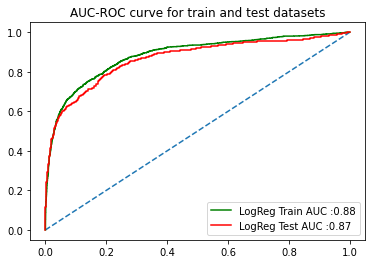

In [191]:
### Predicting on train and test dataset

LR_model1_ytrain_pred = LR_model1.predict(X_train)
LR_model1_ytest_pred = LR_model1.predict(X_test)

## Predicting probabilities on train dataset
LR_model1_trainprobs = LR_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model1_trainprobs = LR_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model1_testprobs = LR_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model1_testprobs = LR_model1_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model1_testprobs),2)
train_label_LR = 'LogReg Train AUC :' + str(train_auc)
test_label_LR = 'LogReg Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model1_trainprobs)
fpr_test_LR, tpr_test_LR, thresholds_test_LR = roc_curve(y_test, LR_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_LR)
plt.plot(fpr_test_LR, tpr_test_LR, color='red', label=test_label_LR)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8920324790662268
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


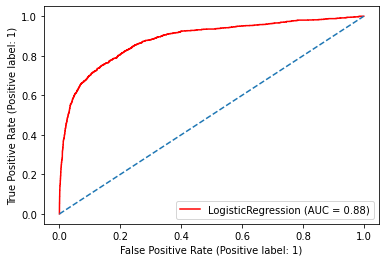

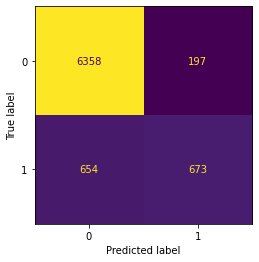

In [192]:
### Evaluation of training dataset

model_eval(LR_model1, X_train, y_train, LR_model1_ytrain_pred, LR_model1_trainprobs)

Accuracy :  0.8913558318531676
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.866


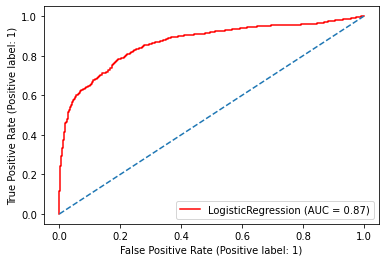

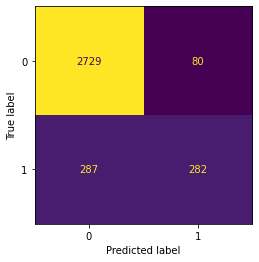

In [193]:
### Evaluation of test dataset

model_eval(LR_model1, X_test, y_test, LR_model1_ytest_pred, LR_model1_testprobs)

### Base model with features selected using Recursive feature elimination (RFE)

In [194]:
from sklearn.feature_selection import RFE

In [195]:
X_train.shape

(7882, 20)

### Using RFE to get ranking of features (using features to select=1)
(as coefficients cannot be used)

In [196]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model = RFE(estimator = LogR, n_features_to_select=1, step=1)
LR_model = LR_model.fit(X_train, y_train)

In [197]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model.ranking_})
selected_cols

,Feature,Rank
0,Tenure,13
1,City_Tier,8
2,CC_Contacted_LY,20
3,User_Count,7
4,CC_Score,11
5,Rev_Permonth,15
6,Complain_LY,1
7,Days_Since_CC,16
8,Payment_Creditcard,5
9,Payment_Debitcard,6


#### LR_model2 : Iteration 1 - features to select = 8

In [31]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model2 = RFE(estimator = LogR, n_features_to_select=8, step=1)
LR_model2 = LR_model2.fit(X_train, y_train)

In [32]:
LR_model2.ranking_

array([ 6,  1, 13,  1,  4,  8,  1,  9,  1,  1, 11,  5,  3,  1, 10,  1, 12,
        7,  1,  2])

In [33]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model2.ranking_})
selected_cols[selected_cols['Rank'] == 1]

,Feature,Rank
1,City_Tier,1
3,User_Count,1
6,Complain_LY,1
8,Payment_Creditcard,1
9,Payment_Debitcard,1
13,ACSegment_Regular,1
15,ACSegment_Super,1
18,Maritalstatus_Single,1


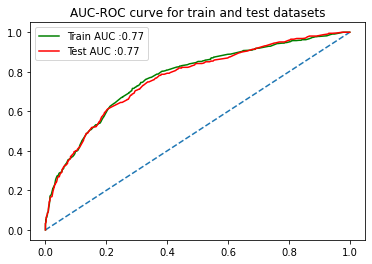

In [34]:
### Predicting on train and test dataset

LR_model2_ytrain_pred = LR_model2.predict(X_train)
LR_model2_ytest_pred = LR_model2.predict(X_test)

## Predicting probabilities on train dataset
LR_model2_trainprobs = LR_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model2_trainprobs = LR_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model2_testprobs = LR_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model2_testprobs = LR_model2_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

**Observations** The AUC for train and test has reduced too much. So the number of variables will be increased in the next iteration. We'll do it in steps of 4

#### LR_model3 : Iteration 2 - features to select = 12

In [35]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model3 = RFE(estimator = LogR, n_features_to_select=12, step=1)
LR_model3 = LR_model3.fit(X_train, y_train)

In [36]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model3.ranking_})
selected_cols[selected_cols['Rank'] == 1]

,Feature,Rank
1,City_Tier,1
3,User_Count,1
4,CC_Score,1
6,Complain_LY,1
8,Payment_Creditcard,1
9,Payment_Debitcard,1
11,Payment_UPI,1
12,Gender_Male,1
13,ACSegment_Regular,1
15,ACSegment_Super,1


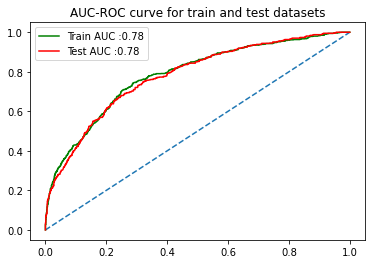

In [37]:
### Predicting on train and test dataset

LR_model3_ytrain_pred = LR_model3.predict(X_train)
LR_model3_ytest_pred = LR_model3.predict(X_test)

## Predicting probabilities on train dataset
LR_model3_trainprobs = LR_model3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model3_trainprobs = LR_model3_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model3_testprobs = LR_model3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model3_testprobs = LR_model3_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

#### LR_model4 : Iteration 3 -  features to select = 16

In [38]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model4 = RFE(estimator = LogR, n_features_to_select=16, step=1)
LR_model4 = LR_model4.fit(X_train, y_train)


In [39]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model4.ranking_})
selected_cols[selected_cols['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
3,User_Count,1
4,CC_Score,1
5,Rev_Permonth,1
6,Complain_LY,1
7,Days_Since_CC,1
8,Payment_Creditcard,1
9,Payment_Debitcard,1
11,Payment_UPI,1


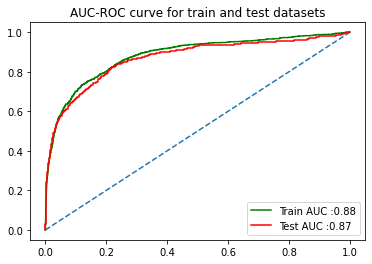

In [40]:
### Predicting on train and test dataset

LR_model4_ytrain_pred = LR_model4.predict(X_train)
LR_model4_ytest_pred = LR_model4.predict(X_test)

## Predicting probabilities on train dataset
LR_model4_trainprobs = LR_model4.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model4_trainprobs = LR_model4_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model4_testprobs = LR_model4.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model4_testprobs = LR_model4_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model4_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model4_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8902562801319462
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6555
           1       0.78      0.49      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.882


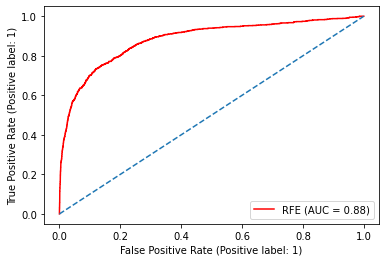

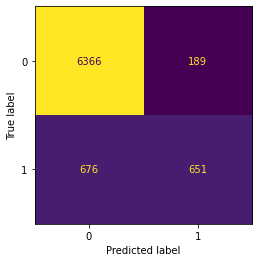

In [41]:
### Training dataset evaluation
model_eval(LR_model4, X_train, y_train, LR_model4_ytrain_pred, LR_model4_trainprobs)

Accuracy :  0.8910597986974541
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.80      0.47      0.59       569

    accuracy                           0.89      3378
   macro avg       0.85      0.72      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.868


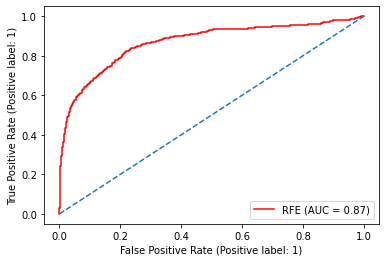

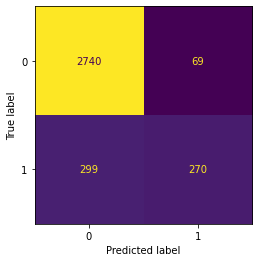

In [42]:
model_eval(LR_model4, X_test, y_test, LR_model4_ytest_pred, LR_model4_testprobs)

#### LR_model5: Iteration 4 -  features to select = 18

In [43]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model5 = RFE(estimator = LogR, n_features_to_select=18, step=1)
LR_model5 = LR_model5.fit(X_train, y_train)

In [44]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model5.ranking_})
selected_cols[selected_cols['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
3,User_Count,1
4,CC_Score,1
5,Rev_Permonth,1
6,Complain_LY,1
7,Days_Since_CC,1
8,Payment_Creditcard,1
9,Payment_Debitcard,1
10,Payment_Ewallet,1


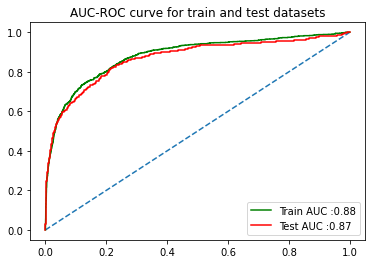

In [45]:
### Predicting on train and test dataset

LR_model5_ytrain_pred = LR_model5.predict(X_train)
LR_model5_ytest_pred = LR_model5.predict(X_test)

## Predicting probabilities on train dataset
LR_model5_trainprobs = LR_model5.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model5_trainprobs = LR_model5_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model5_testprobs = LR_model5.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model5_testprobs = LR_model5_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model5_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model5_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model5_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model5_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8894950520172545
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6555
           1       0.77      0.49      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.882


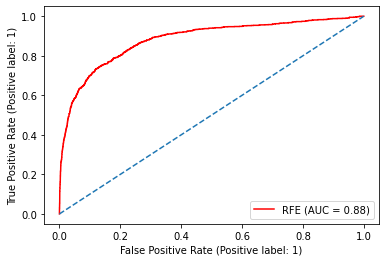

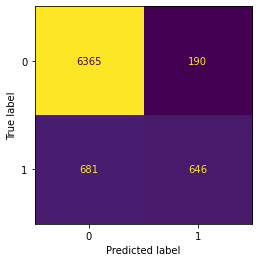

In [46]:
model_eval(LR_model5, X_train, y_train, LR_model5_ytrain_pred, LR_model5_trainprobs)

Accuracy :  0.8910597986974541
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.79      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.85      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.868


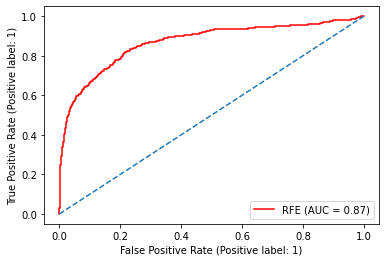

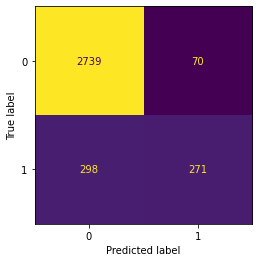

In [47]:
model_eval(LR_model5, X_test, y_test, LR_model5_ytest_pred, LR_model5_testprobs)

#### LR_model6: Iteration 5: features to select = 19

In [48]:
LogR = LogisticRegression(random_state=123, max_iter=1000)
LR_model6 = RFE(estimator = LogR, n_features_to_select=19, step=1)
LR_model6 = LR_model6.fit(X_train, y_train)

In [49]:
selected_cols = pd.DataFrame({'Feature': X.columns, 'Rank': LR_model6.ranking_})
selected_cols[selected_cols['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
3,User_Count,1
4,CC_Score,1
5,Rev_Permonth,1
6,Complain_LY,1
7,Days_Since_CC,1
8,Payment_Creditcard,1
9,Payment_Debitcard,1
10,Payment_Ewallet,1


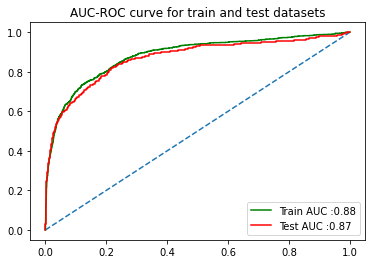

In [50]:
### Predicting on train and test dataset

LR_model6_ytrain_pred = LR_model6.predict(X_train)
LR_model6_ytest_pred = LR_model6.predict(X_test)

## Predicting probabilities on train dataset
LR_model6_trainprobs = LR_model6.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model6_trainprobs = LR_model6_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model6_testprobs = LR_model6.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model6_testprobs = LR_model6_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model6_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model6_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model6_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model6_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();



Accuracy :  0.8894950520172545
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6555
           1       0.77      0.49      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.882


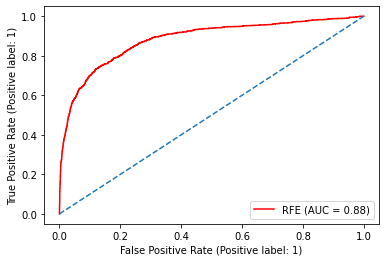

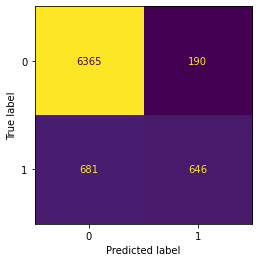

In [51]:
model_eval(LR_model6, X_train, y_train, LR_model6_ytrain_pred, LR_model6_trainprobs)

Accuracy :  0.8913558318531676
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.80      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.85      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.868


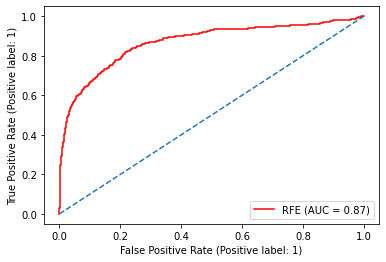

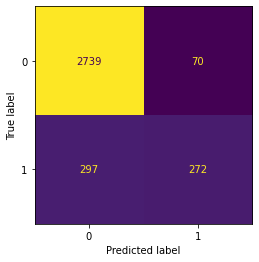

In [52]:
model_eval(LR_model6, X_test, y_test, LR_model6_ytest_pred, LR_model6_testprobs)

**Observations**: Reducing variables has not had effect on model performance. Hence we will go with 20 predictors.

### LR_model7: Hyperparameter tuning using GridSearchCV

In [53]:
##Commenting GridSearch CV code after first run, as best parameters have been noted down and re-runs need not run this code again

#grid={'penalty':['l2','none','l1','elasticnet'],
#      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
#      'tol':[0.0001,0.00001], # 0.1, 0.01,0.001,
#     'l1_ratio':[0.25,0.5,0.75]}

In [54]:
#model = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1)

In [55]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [56]:
#grid_search.fit(X_train, y_train)

In [57]:
#print(grid_search.best_params_,'\n')
#print(grid_search.best_estimator_)

Best hyper parameters based on Grid search: 
    {'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

In [58]:
LR_model7 = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='none',
                               solver='sag', tol=0.00001)

In [59]:
LR_model7 = LR_model7.fit(X_train, y_train)

C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [60]:
### Predicting on train and test dataset

LR_model7_ytrain_pred = LR_model7.predict(X_train)
LR_model7_ytest_pred = LR_model7.predict(X_test)

## Predicting probabilities on train dataset
LR_model7_trainprobs = LR_model7.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model7_trainprobs = LR_model7_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model7_testprobs = LR_model7.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model7_testprobs = LR_model7_testprobs[:, 1]


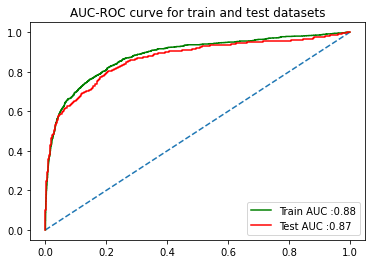

In [61]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model7_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model7_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model7_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model7_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();



Accuracy :  0.890636894189292
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.50      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


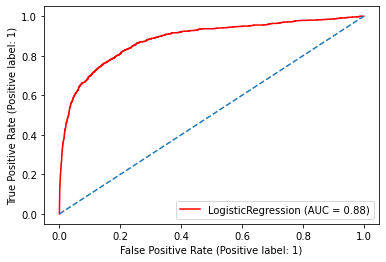

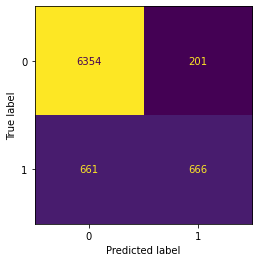

In [62]:
### model evaluation on train dataset
model_eval(LR_model7, X_train, y_train, LR_model7_ytrain_pred, LR_model7_trainprobs)

Accuracy :  0.8907637655417406
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.867


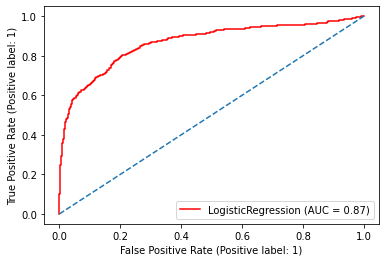

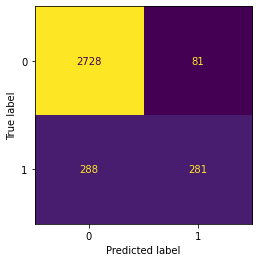

In [63]:
### model evaluation on test dataset
model_eval(LR_model7, X_test, y_test, LR_model7_ytest_pred, LR_model7_testprobs)

### LR_model8: Best of above LR models ie, LR_model1 fit on Smote resampled dataset

In [64]:
LR_model8 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)
LR_model8 = LR_model8.fit(X_res, y_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [65]:
### Predicting on train and test dataset

LR_model8_ytrain_pred = LR_model8.predict(X_res)
LR_model8_ytest_pred = LR_model8.predict(X_test)

## Predicting probabilities on train dataset
LR_model8_trainprobs = LR_model8.predict_proba(X_res)
# # keep probabilities for the positive outcome only
LR_model8_trainprobs = LR_model8_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model8_testprobs = LR_model8.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model8_testprobs = LR_model8_testprobs[:, 1]


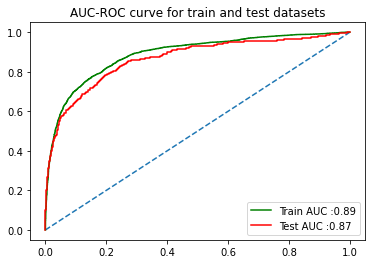

In [66]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_res, LR_model8_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model8_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_res, LR_model8_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model8_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8089244851258581
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6555
           1       0.80      0.82      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110

AUC: 0.889


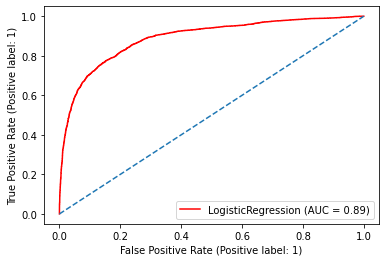

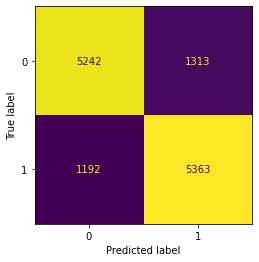

In [67]:
model_eval(LR_model8, X_res, y_res, LR_model8_ytrain_pred, LR_model8_trainprobs)


Accuracy :  0.7927767910005921
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2809
           1       0.44      0.79      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.79      0.71      3378
weighted avg       0.86      0.79      0.81      3378

AUC: 0.865


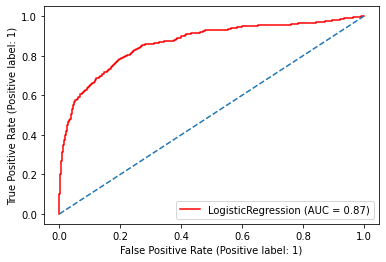

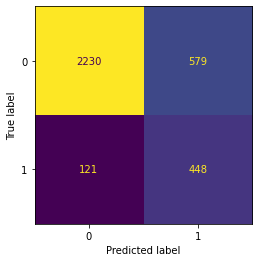

In [68]:
model_eval(LR_model8, X_test, y_test, LR_model8_ytest_pred, LR_model8_testprobs)

## LR_model9: Logistic regression using default model, scaled data 

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
sc = StandardScaler()
Xtrain_std = sc.fit_transform(X_train)
Xtest_std = sc.transform(X_test)

In [201]:
LR_model9 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)
LR_model9 = LR_model9.fit(Xtrain_std, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


In [206]:
### Predicting on train and test dataset
LR_model9_ytrain_pred = LR_model9.predict(Xtrain_std)
LR_model9_ytest_pred = LR_model9.predict(Xtest_std)

## Predicting probabilities on train dataset
LR_model9_trainprobs = LR_model9.predict_proba(Xtrain_std)
# # keep probabilities for the positive outcome only
LR_model9_trainprobs = LR_model9_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model9_testprobs = LR_model9.predict_proba(Xtest_std)
# # keep probabilities for the positive outcome only
LR_model9_testprobs = LR_model9_testprobs[:, 1]


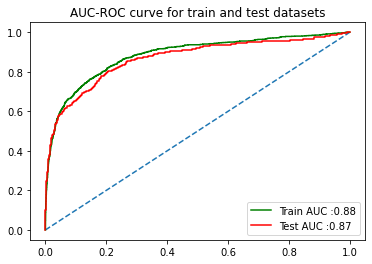

In [207]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, LR_model9_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model9_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model9_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model9_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8908906368941893
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.50      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


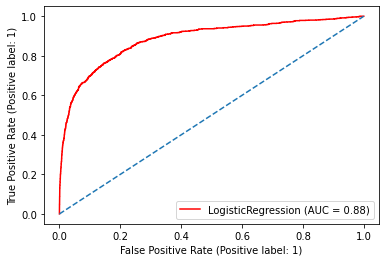

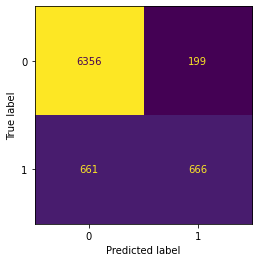

In [208]:
### Evaluation of training dataset
model_eval(LR_model9, Xtrain_std, y_train, LR_model9_ytrain_pred, LR_model9_trainprobs)

Accuracy :  0.8907637655417406
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.867


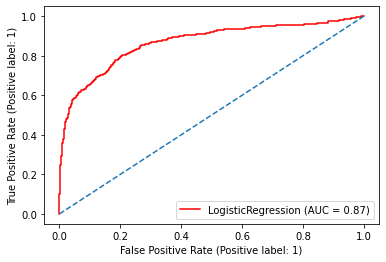

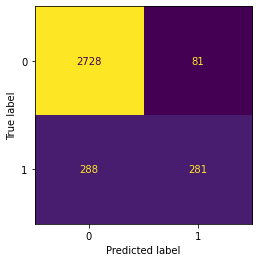

In [209]:
### Evaluation of test dataset
model_eval(LR_model9, Xtest_std, y_test, LR_model9_ytest_pred, LR_model9_testprobs)

## LR_model10: Logistic Regression using Statsmodel

In [217]:
## Statsmodel requires X and y variables to be part of the same dataset. Identification of y is done in the formula.
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [218]:
train_df['Churn']=train_df['Churn'].astype('int64')
test_df['Churn']=test_df['Churn'].astype('int64')

In [219]:
import statsmodels.formula.api as SM

In [220]:
train_df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'User_Count', 'CC_Score',
       'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Payment_Creditcard',
       'Payment_Debitcard', 'Payment_Ewallet', 'Payment_UPI', 'Gender_Male',
       'ACSegment_Regular', 'ACSegment_Regularplus', 'ACSegment_Super',
       'ACSegment_Superplus', 'Maritalstatus_Married', 'Maritalstatus_Single',
       'Logindevice_Mobile', 'Churn'],
      dtype='object')

In [221]:
### The formula was recursively changed to drop variable one by one so that the p-value of all variables finally was < 0.05
## Iteration 1: ACSegment_Superplus removed
## Iteration 2: Payment_Ewallet removed
## Iteration 3: ACSegment_Regularplus removed
## Iteration 4: Maritalstatus_Married removed


f_1 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + User_Count + CC_Score + Rev_Permonth + Complain_LY + Days_Since_CC +\
Payment_Creditcard + Payment_Debitcard + Payment_UPI + Gender_Male + ACSegment_Regular +\
+ ACSegment_Super +  Maritalstatus_Single + Logindevice_Mobile'

### Fitting the logistic regression model iteratively to determine significant variables

In [222]:
LR_model10 = SM.logit(formula = f_1, data=train_df).fit()

Optimization terminated successfully.
         Current function value: 0.289744
         Iterations 8


In [223]:
LR_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7865
Method:                           MLE   Df Model:                           16
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.3608
Time:                        11:44:33   Log-Likelihood:                -2283.8
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.3795      0.264    -16.616      0.000      -4.896      -3.863
Tenure                  -0.1911      0.008    -24.653      0.000      -0.206      -0.176
City_Tier                0.3733      0.045      8.276      0.000       0.285       0.462
CC_Contacted_LY          0.0330      0.004      7.342      0.000       0.024       0.042
User_Count               0.3469      0.039      8.801      0.000       0.270       0.424
CC_Score                 0.2592      0.028      9.114      0.000       0.203       0.315
Rev_Permonth             0.1484      0.013     11.438      0.000       0.123       0.174
Complain_LY              1.6698      0.079     21.029      0.000       1.514       1.825
Days_Since_CC           -0.0686      0.012     -5.534      0.000      -0.093      -0.044
Payment_Creditcard      -0.6387      0.111     -5.756      0.000      -0.856      -0.421
Payment_Debitcard       -0.4482      0.102     -4.382      0.000      -0.649      -0.248
Payment_UPI             -0.5182      0.158     -3.280      0.001      -0.828      -0.209
Gender_Male              0.2829      0.078      3.609      0.000       0.129       0.437
ACSegment_Regular        1.0364      0.268      3.867      0.000       0.511       1.562
ACSegment_Super         -1.2345      0.094    -13.197      0.000      -1.418      -1.051
Maritalstatus_Single     0.9244      0.078     11.860      0.000       0.772       1.077
Logindevice_Mobile      -0.3870      0.079     -4.887      0.000      -0.542      -0.232
========================================================================================
"""

In [224]:
## Iteration 1: ACSegment_Superplus removed
## Iteration 2: Payment_Ewallet removed
## Iteration 3: ACSegment_Regularplus removed
## Iteration 4: Maritalstatus_Married removed

<b> Observations: </b> Over multiple iterations, the variables were eliminated one by one such that only variables with 
p-value < 0.05 remained in the model. 

With linear OLS regression, model coefficients have a straightforward interpretation: a model coefficient b means that for every one-unit increase in x, the model predicts a b-unit increase in Y^ (the predicted value of the outcome variable). E.g., if we were using GPA to predict test scores, a coefficient of 10 for GPA would mean that for every one-point increase in GPA we expect a 10-point increase on the test. Technically, the logistic regression coefficient means the same thing: as GPA goes up by 1, the log odds of being accepted go up by 1.051109. However, log odds are difficult to interpret, especially relative log odds: while we can straighforwardly calculate that a log odds of 1 on its own means a 73.1% chance of acceptance, an increase of 1 in log odds means something different depending on what the log odds increased from. 

Hence we would simply use the direction of coefficient to determine the impact on Churn. 
Reference: https://www.polyu.edu.hk/cbs/sjpolit/logisticregression.html

The following variables have a positive correlation with Churn, i.e, as the variable increases, churn increases.
    City tier, User count, Customer care score, Revenue per month, Complaint last year, Regular customer segment and Single marital status.
    
The following variables have a negative correlation with Churn, i.e, as the variable increases, churn decreases.
    Tenure, Credit/debit/UPI payment, Super segment, Mobile login device 

In [225]:
## Predicting train and test probabilities
LR_model10_trainprobs = LR_model10.predict(train_df)
LR_model10_testprobs = LR_model10.predict(test_df)

In [226]:
## Getting the binary predictions for train dataset with threshold = 0.5
LR_model10_ytrain_pred =[]
for i in range(0,len(LR_model10_trainprobs)):
    if np.array(LR_model10_trainprobs)[i]>0.5:
        a=1
    else:
        a=0
    LR_model10_ytrain_pred.append(a)

In [227]:
## Getting the binary predictions for test dataset with threshold = 0.5
LR_model10_ytest_pred =[]
for i in range(0,len(LR_model10_testprobs)):
    if np.array(LR_model10_testprobs)[i]>0.5:
        a=1
    else:
        a=0
    LR_model10_ytest_pred.append(a)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.78      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.89      0.89      0.88      7882



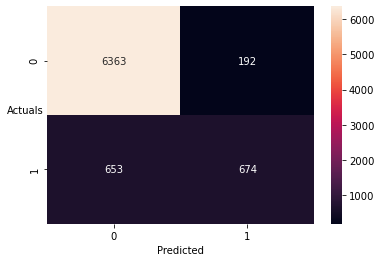

In [228]:
## Evaluating model performance on train dataset
print(classification_report(train_df['Churn'],LR_model10_ytrain_pred))

sns.heatmap((confusion_matrix(train_df['Churn'],LR_model10_ytrain_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.79      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



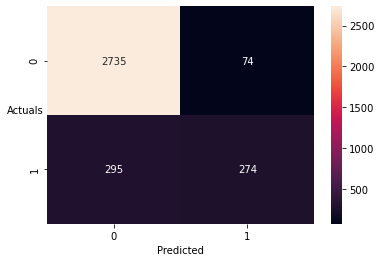

In [229]:
### Evaluating model performance on test dataset

print(classification_report(test_df['Churn'],LR_model10_ytest_pred))

sns.heatmap((confusion_matrix(test_df['Churn'],LR_model10_ytest_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

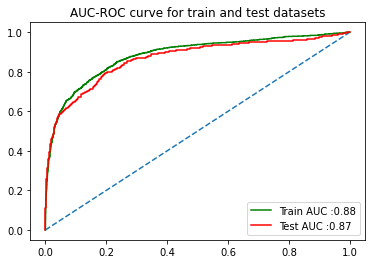

In [230]:
### ROC-AUC curve

# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model10_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model10_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model10_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model10_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

**Observations:** The best model in LogisticRegression is the base model using Sklearn after dropping 3 variables that had high VIF. This would be compared against best models of other algorithms.

## Linear Discriminant Analysis

### LDA_model1: Base model with outlier treated unscaled data

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
#Build LDA Model & Train
LDA_model1 = LinearDiscriminantAnalysis()
LDA_model1 = LDA_model1.fit(X_train,y_train)

In [85]:
### Predicting on train and test dataset

LDA_model1_ytrain_pred = LDA_model1.predict(X_train)
LDA_model1_ytest_pred = LDA_model1.predict(X_test)

## Predicting probabilities on train dataset
LDA_model1_trainprobs = LDA_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA_model1_trainprobs = LDA_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA_model1_testprobs = LDA_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA_model1_testprobs = LDA_model1_testprobs[:, 1]


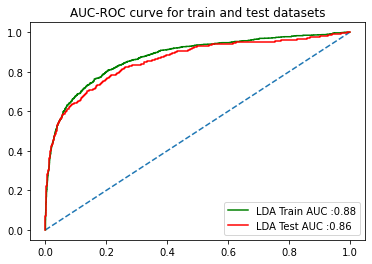

In [86]:
# # calculate roc AUC
train_auc = round(roc_auc_score(y_train, LDA_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA_model1_testprobs),2)
train_label_LDA = 'LDA Train AUC :' + str(train_auc)
test_label_LDA = 'LDA Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA_model1_trainprobs)
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test, LDA_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_LDA)
plt.plot(fpr_test_LDA, tpr_test_LDA, color='red', label=test_label_LDA)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8869576249682821
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.876


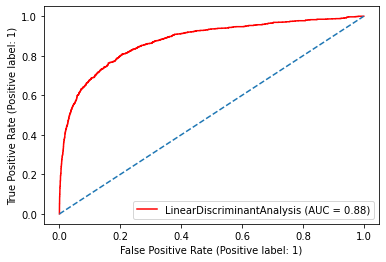

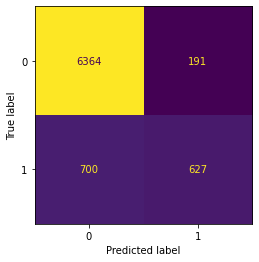

In [87]:
### Evaluation of training dataset

model_eval(LDA_model1, X_train, y_train, LDA_model1_ytrain_pred, LDA_model1_trainprobs)


Accuracy :  0.8848431024274719
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378

AUC: 0.858


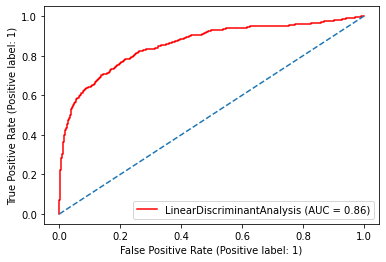

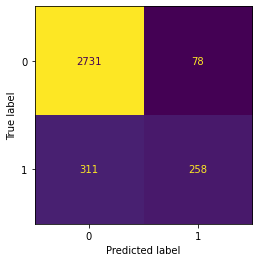

In [88]:
### Evaluation of test dataset

model_eval(LDA_model1, X_test, y_test, LDA_model1_ytest_pred, LDA_model1_testprobs)

### LDA_model2 : Hyperparameter tuning using Grid Search CV 

In [89]:
##Commenting GridSearch CV code after first run, as best parameters have been noted down and re-runs need not run this code again

grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.001, 0.0001,0.00001], 
     'shrinkage':['auto', float, 'None']}

In [90]:
model = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)


C:\Users\91984\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan 0.5722892 0.5722892 0.5722892 0.5722892
 0.5722892 0.5722892       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', <class 'float'>, 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [91]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [92]:
LDA_model2 = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.001)
LDA_model2 = LDA_model2.fit(X_train, y_train)

In [93]:
### Predicting on train and test dataset

LDA_model2_ytrain_pred = LDA_model2.predict(X_train)
LDA_model2_ytest_pred = LDA_model2.predict(X_test)

## Predicting probabilities on train dataset
LDA_model2_trainprobs = LDA_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA_model2_trainprobs = LDA_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA_model2_testprobs = LDA_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA_model2_testprobs = LDA_model2_testprobs[:, 1]

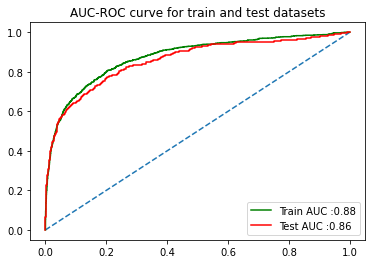

In [94]:
# # calculate auc and plot roc curve
train_auc = round(roc_auc_score(y_train, LDA_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA_model2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LDA_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.887338239025628
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.876


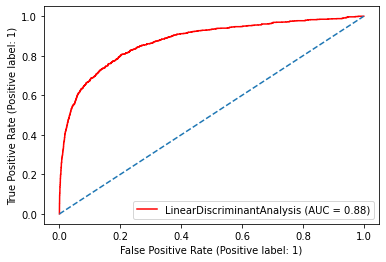

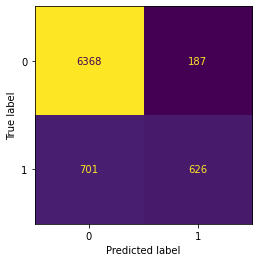

In [95]:
### Evaluation of training dataset
model_eval(LDA_model2, X_train, y_train, LDA_model2_ytrain_pred, LDA_model2_trainprobs)

Accuracy :  0.8848431024274719
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378

AUC: 0.858


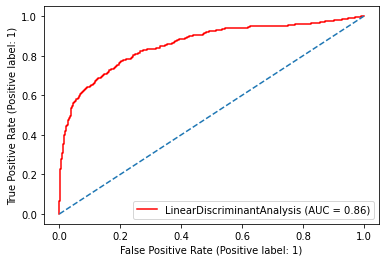

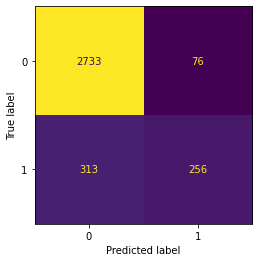

In [96]:
### Evaluation of test dataset
model_eval(LDA_model2, X_test, y_test, LDA_model2_ytest_pred, LDA_model2_testprobs)

In [97]:
pd.DataFrame(LDA_model2.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])

,Coefficient
Tenure,-0.127919
City_Tier,0.372012
CC_Contacted_LY,0.032366
User_Count,0.323650
CC_Score,0.280958
Rev_Permonth,0.127603
Complain_LY,1.916931
Days_Since_CC,-0.069039
Payment_Creditcard,-0.821820
Payment_Debitcard,-0.647071


## Quadratic Discriminant Analysis

In [98]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [99]:
QDA_model1 = QuadraticDiscriminantAnalysis()

In [100]:
QDA_model1 = QDA_model1.fit(X_train, y_train)

In [101]:
### Predicting on train and test dataset

QDA_model1_ytrain_pred = QDA_model1.predict(X_train)
QDA_model1_ytest_pred = QDA_model1.predict(X_test)

## Predicting probabilities on train dataset
QDA_model1_trainprobs = QDA_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
QDA_model1_trainprobs = QDA_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
QDA_model1_testprobs = QDA_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
QDA_model1_testprobs = QDA_model1_testprobs[:, 1]


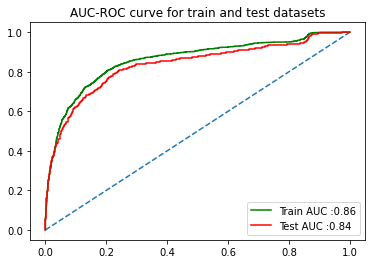

In [102]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, QDA_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, QDA_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, QDA_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, QDA_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8387465110378076
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6555
           1       0.51      0.73      0.60      1327

    accuracy                           0.84      7882
   macro avg       0.73      0.79      0.75      7882
weighted avg       0.87      0.84      0.85      7882

AUC: 0.860


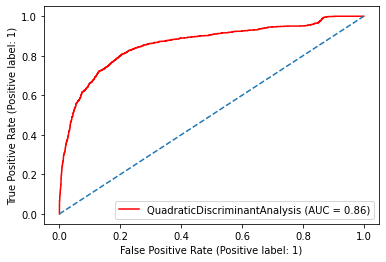

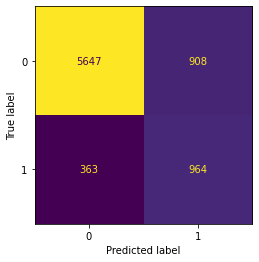

In [103]:
### Evaluation of training dataset
model_eval(QDA_model1, X_train, y_train, QDA_model1_ytrain_pred, QDA_model1_trainprobs)

Accuracy :  0.8291888691533452
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2809
           1       0.49      0.68      0.57       569

    accuracy                           0.83      3378
   macro avg       0.71      0.77      0.73      3378
weighted avg       0.86      0.83      0.84      3378

AUC: 0.835


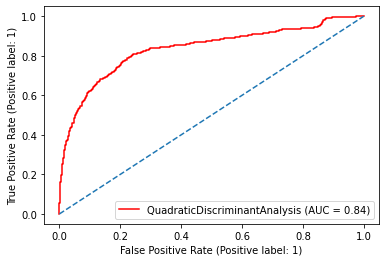

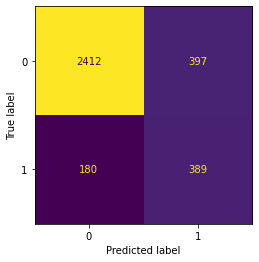

In [104]:
### Evaluation of test dataset
model_eval(QDA_model1, X_test, y_test, QDA_model1_ytest_pred, QDA_model1_testprobs)

## Support vector machine classifier

In [105]:
from sklearn import svm

### Model evaluation without AUC calculation and probability inputs

In [106]:
def model_eval1(model,xtrue,ytrue,ypred):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

### Scaling data for SVM as it is distance based

In [107]:
from sklearn.preprocessing import StandardScaler    

In [108]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### SVM_model1 : Default base model

In [109]:
## Creating model and fitting train dataset

SVM_model1 = svm.SVC(random_state=1, probability=True)
SVM_model1.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [110]:
### Predicting on train and test dataset

SVM_model1_ytrain_pred = SVM_model1.predict(X_train)
SVM_model1_ytest_pred = SVM_model1.predict(X_test)

In [111]:
## Predicting probabilities on train dataset
SVM_model1_trainprobs = SVM_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_model1_trainprobs = SVM_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model1_testprobs = SVM_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_model1_testprobs = SVM_model1_testprobs[:, 1]

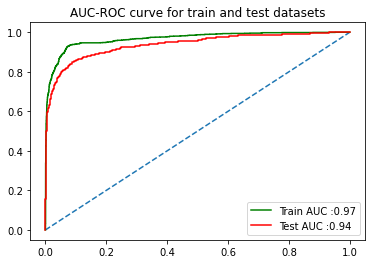

In [112]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, SVM_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, SVM_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9412585638162903
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6555
           1       0.93      0.71      0.80      1327

    accuracy                           0.94      7882
   macro avg       0.93      0.85      0.88      7882
weighted avg       0.94      0.94      0.94      7882

AUC: 0.968


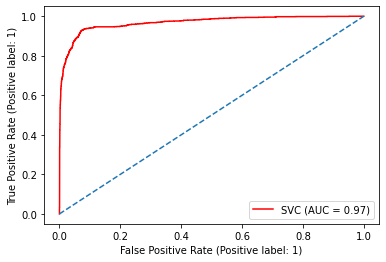

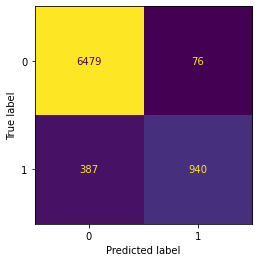

In [113]:
### Evaluation of training dataset
model_eval(SVM_model1, X_train, y_train, SVM_model1_ytrain_pred, SVM_model1_trainprobs)

Accuracy :  0.9274718768502073
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.90      0.64      0.75       569

    accuracy                           0.93      3378
   macro avg       0.92      0.81      0.85      3378
weighted avg       0.93      0.93      0.92      3378



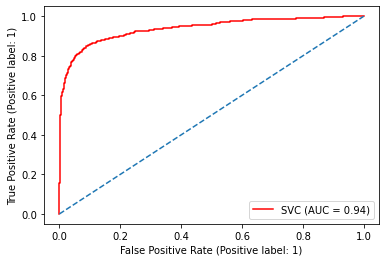

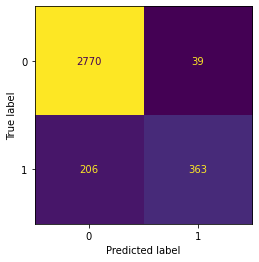

In [114]:
### Evaluation of test dataset
model_eval1(SVM_model1, X_test, y_test, SVM_model1_ytest_pred)

### SVM_model2: Hyperparameter tuned model

In [115]:
### Grid search 

grid={'C':[1,2,3,4,5,6,7,8,9],
      'kernel':['linear','poly','rbf','sigmoid'],
      'degree':[3,4,5],
      'gamma':['scale','auto'],
      'class_weight':['balanced','None'],
      'tol':[0.001,0.0001]
     }

In [116]:
model = svm.SVC(max_iter=2000,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

C:\Users\91984\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.34613504 0.34613504 0.75076161 0.75076161 0.75626995 0.75626995
 0.4338844  0.4338844  0.34613504 0.34613504 0.74828138 0.74828138
 0.75163918 0.75163918 0.43375094 0.43375094 0.34613504 0.34613504
 0.80870458 0.80870458 0.75626995 0.75626995 0.4338844  0.4338844
 0.34613504 0.34613504 0.80937693 0.80937693 0.75163918 0.75163918
 0.43375094 0.43375094 0.34613504 0.34613504 0.8289239  0.8289239
 0.75626995 0.75626995 0.4338844  0.4338844  0.34613504 0.34613504
 0.82877463 0.82877463 0.75163918 0.75163918 0.43375094 0.43375094
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan

{'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 

SVC(C=9, class_weight='balanced', degree=5, kernel='poly', max_iter=2000,
    random_state=1)


C:\Users\91984\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [117]:
### Best parameters chosen has been recorded below
#{'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 

In [118]:
SVM_model2 = svm.SVC(C=9, class_weight='balanced', degree=5, gamma='scale', kernel='poly', tol=0.001, random_state=1, probability=True)
SVM_model2 = SVM_model2.fit(X_train,y_train)

In [119]:
### Predicting on train and test dataset
SVM_model2_ytrain_pred = SVM_model2.predict(X_train)
SVM_model2_ytest_pred = SVM_model2.predict(X_test)

## Predicting probabilities on train dataset
SVM_model2_trainprobs = SVM_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_model2_trainprobs = SVM_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model2_testprobs = SVM_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_model2_testprobs = SVM_model2_testprobs[:, 1]

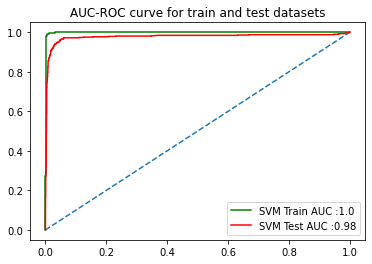

In [120]:
# # calculate roc AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, SVM_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_model2_testprobs),2)
train_label_SVM = 'SVM Train AUC :' + str(train_auc)
test_label_SVM = 'SVM Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_model2_trainprobs)
fpr_test_SVM, tpr_test_SVM, thresholds_test_SVM = roc_curve(y_test, SVM_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_SVM)
plt.plot(fpr_test_SVM, tpr_test_SVM, color='red', label=test_label_SVM)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9873128647551382
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6555
           1       0.93      1.00      0.96      1327

    accuracy                           0.99      7882
   macro avg       0.97      0.99      0.98      7882
weighted avg       0.99      0.99      0.99      7882

AUC: 0.999


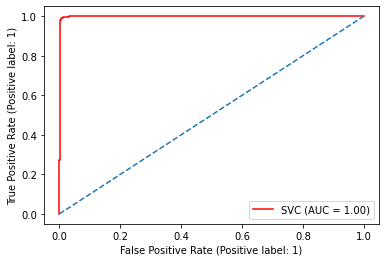

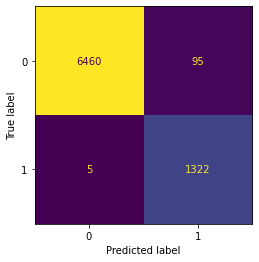

In [121]:
### Evaluation of training dataset
model_eval(SVM_model2, X_train, y_train, SVM_model2_ytrain_pred, SVM_model2_trainprobs)

Accuracy :  0.9653641207815276
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2809
           1       0.87      0.93      0.90       569

    accuracy                           0.97      3378
   macro avg       0.93      0.95      0.94      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.977


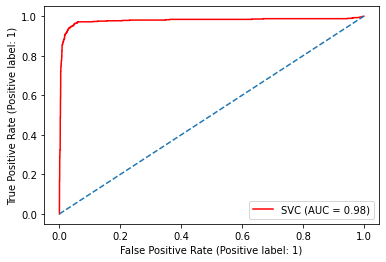

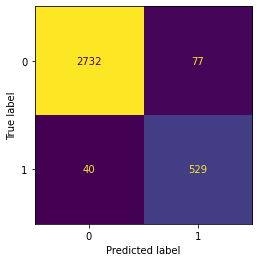

In [122]:
### Evaluation of test dataset
model_eval(SVM_model2, X_test, y_test, SVM_model2_ytest_pred, SVM_model2_testprobs)

### SVM_model3: SVM with outlier data & best GridSearchCV data

In [123]:
VIF_drop

['Cashback', 'Service_Score', 'Clusters']

In [124]:
X_outlier = df_outlier.drop(['Cashback', 'Service_Score', 'Clusters','Churn'],axis=1)
y_outlier = df_outlier['Churn']

In [125]:
# Split X and y into training and test set in 70:30 ratio
X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(X_outlier, y_outlier, test_size=0.30 , random_state=1, stratify=y) 

In [126]:
### Scaling
sc = StandardScaler()
X_train_outlier = sc.fit_transform(X_train_outlier)
X_test_outlier = sc.transform(X_test_outlier)

In [127]:
## Best grid data from SVM_model2: {'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 
SVM_model3 = svm.SVC(C=9, class_weight='balanced', degree=5, gamma='scale', kernel='poly', tol=0.001, random_state=1, probability=True)

In [128]:
SVM_model3 = SVM_model3.fit(X_train_outlier,y_train_outlier)

In [129]:
### Predicting on train and test dataset

SVM_model3_ytrain_pred = SVM_model3.predict(X_train_outlier)
SVM_model3_ytest_pred = SVM_model3.predict(X_test_outlier)


In [130]:
## Predicting probabilities on train dataset
SVM_model3_trainprobs = SVM_model3.predict_proba(X_train_outlier)
# # keep probabilities for the positive outcome only
SVM_model3_trainprobs = SVM_model3_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model3_testprobs = SVM_model3.predict_proba(X_test_outlier)
# # keep probabilities for the positive outcome only
SVM_model3_testprobs = SVM_model3_testprobs[:, 1]

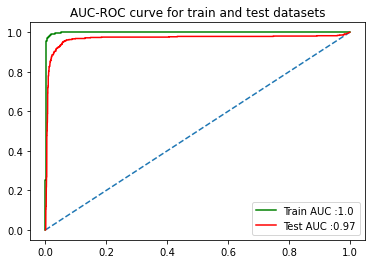

In [131]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_outlier, SVM_model3_trainprobs),2)
test_auc = round(roc_auc_score(y_test_outlier, SVM_model3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_outlier, SVM_model3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_outlier, SVM_model3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();



Accuracy :  0.9786856127886323
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6555
           1       0.89      0.99      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.95      0.98      0.96      7882
weighted avg       0.98      0.98      0.98      7882

AUC: 0.998


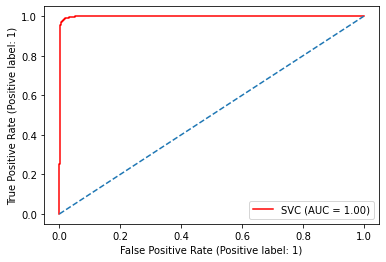

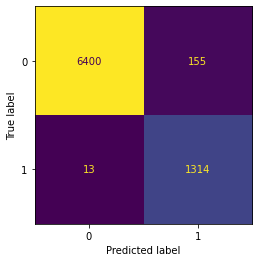

In [132]:
### Evaluation of training dataset
model_eval(SVM_model3, X_train_outlier, y_train_outlier, SVM_model3_ytrain_pred, SVM_model3_trainprobs)

Accuracy :  0.9544108940201302
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2809
           1       0.83      0.92      0.87       569

    accuracy                           0.95      3378
   macro avg       0.91      0.94      0.92      3378
weighted avg       0.96      0.95      0.96      3378

AUC: 0.968


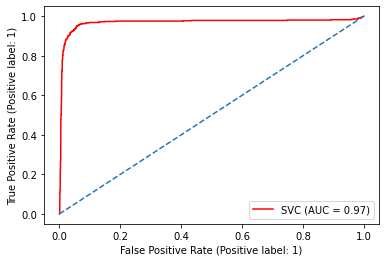

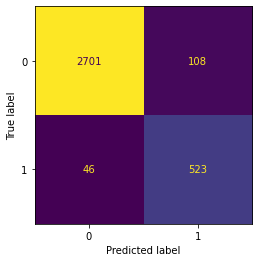

In [133]:
### Evaluation of test dataset
model_eval(SVM_model3, X_test_outlier, y_test_outlier, SVM_model3_ytest_pred, SVM_model3_testprobs)

**Observations**: Out of the 4 algorithms in this notebook, Logistic regression and LDA are linear models. QDA is non-linear and SVM has both linear and non-linear implementations. The best model is SVM's non-linear poly kernel (SVM_model2) and has given a test precision and recall of 0.87 and 0.93 respectively.

### Feature importance for the best SVM model

In [134]:
## SVM_model2.coef_ can be used to extract the coefficients only if linear kernel is used. In this case, poly was used. Hence
## feature importance cannot be determined using this. Instead, we will use a wrapper function to determine
## the feature importance.

In [135]:
from sklearn.inspection import permutation_importance

In [136]:
imps = permutation_importance(SVM_model2, X_test, y_test)

C:\Users\91984\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1490: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


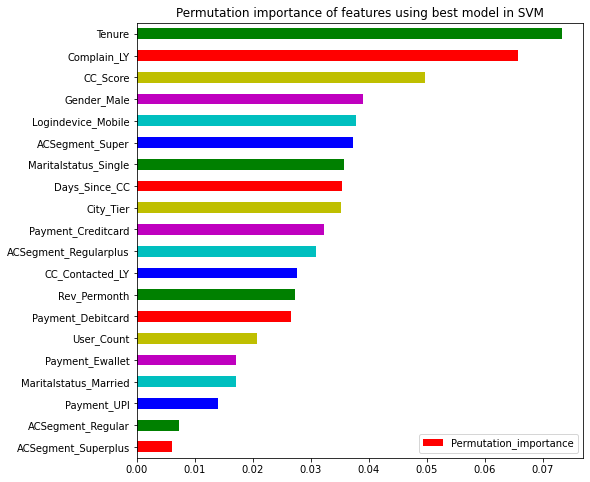

In [137]:
imp_df = pd.DataFrame(imps.importances_mean, columns=['Permutation_importance'], index = X.columns)
## plotting graph
imp_df = imp_df.sort_values(by='Permutation_importance')
my_colors = 'rgbcmy'
#my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
imp_df.plot(kind='barh', color = my_colors, figsize=(8,8))
plt.title("Permutation importance of features using best model in SVM")
plt.show();


### Comparison of ROC curve for best models of each algorithm

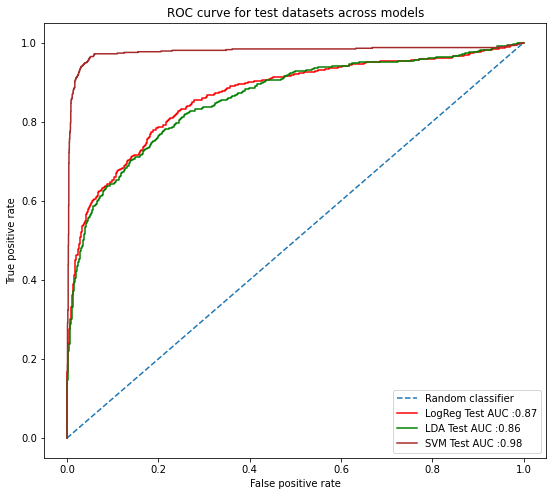

In [138]:
# # plot the roc curve for the model
plt.figure(figsize=(9,8))
plt.plot([0, 1], [0, 1], linestyle='--',label='Random classifier')
plt.plot(fpr_test_LR, tpr_test_LR, color='red', label=test_label_LR)
plt.plot(fpr_test_LDA, tpr_test_LDA, color='green', label=test_label_LDA)
plt.plot(fpr_test_SVM, tpr_test_SVM, color='brown', label=test_label_SVM)
plt.legend(loc='best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for test datasets across models")
plt.show();

In [151]:
fpr_test_LR.shape, fpr_test_LDA.shape, fpr_test_SVM.shape 

((697,), (711,), (301,))

In [165]:
## Writing the ROC curve values to disk for comprehensive plotting in next part of python notebook
## Cannot write in one file as the arrays are of different lengths

df_LR = pd.DataFrame(pd.concat([pd.Series(fpr_test_LR),pd.Series(tpr_test_LR)],axis=1))
df_LR.columns = ['fpr_test_LR','tpr_test_LR']
df_LR.to_csv("ROC_LR.csv",index=False)

df_LDA = pd.DataFrame(pd.concat([pd.Series(fpr_test_LDA),pd.Series(tpr_test_LDA)],axis=1))
df_LDA.columns = ['fpr_test_LDA','tpr_test_LDA']
df_LDA.to_csv("ROC_LDA.csv",index=False)

df_SVM = pd.DataFrame(pd.concat([pd.Series(fpr_test_SVM),pd.Series(tpr_test_SVM)],axis=1))
df_SVM.columns = ['fpr_test_SVM','tpr_test_SVM']
df_SVM.to_csv("ROC_SVM.csv",index=False)

## To be continued

The next python notebook will contain remaining models such as ANN, KNN, Random forest, Adaboost and Gradient boost